In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Parameters
IMG_SIZE = 224  # MobileNet requires input images to be at least 224x224
BATCH_SIZE = 32
NUM_CLASSES = 5  # Change this to the number of classes in your dataset

In [3]:

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,  # Exclude the top layer
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:


# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce dimensions
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Final classification layer


In [5]:

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

In [6]:

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:


# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split dataset into training and validation sets
)

In [9]:


train_generator = train_datagen.flow_from_directory(
    r"C:\Users\SURENDHAN\Desktop\repo\DR-detection\pro\colored_images",  # Replace with your dataset directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 2927 images belonging to 5 classes.


In [10]:

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\SURENDHAN\Desktop\repo\DR-detection\pro\colored_images",  # Replace with your dataset directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 729 images belonging to 5 classes.


In [11]:


# Train the model
EPOCHS = 5
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

c:\Users\SURENDHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.5689 - loss: 1.4446

c:\Users\SURENDHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 76s 807ms/step - accuracy: 0.5698 - loss: 1.4403 - val_accuracy: 0.7202 - val_loss: 0.6986
Epoch 2/5
 1/91 ━━━━━━━━━━━━━━━━━━━━ 57s 638ms/step - accuracy: 0.6875 - loss: 0.9761

c:\Users\SURENDHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.6875 - loss: 0.9761 - val_accuracy: 0.7145 - val_loss: 0.7224
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 71s 785ms/step - accuracy: 0.7093 - loss: 0.8141 - val_accuracy: 0.7642 - val_loss: 0.6595
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - accuracy: 0.5938 - loss: 0.9777 - val_accuracy: 0.7500 - val_loss: 0.6693
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 67s 736ms/step - accuracy: 0.7195 - loss: 0.7285 - val_accuracy: 0.7472 - val_loss: 0.6499


In [12]:
# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Continue training with fine-tuning
history_fine_tune = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 73s 774ms/step - accuracy: 0.7283 - loss: 0.7167 - val_accuracy: 0.7670 - val_loss: 0.6556
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.6562 - loss: 1.0387 - val_accuracy: 0.7741 - val_loss: 0.6172
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 73s 802ms/step - accuracy: 0.7268 - loss: 0.7155 - val_accuracy: 0.7628 - val_loss: 0.6349
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.7188 - loss: 0.8697 - val_accuracy: 0.7841 - val_loss: 0.6323
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 67s 741ms/step - accuracy: 0.7530 - loss: 0.6841 - val_accuracy: 0.7741 - val_loss: 0.6425


In [14]:
# Save the trained model
model.save('retinopathy_mobilenet_model.h5')

# Evaluate the model on a test set (if available)
test_generator = train_datagen.flow_from_directory(
    r"C:\Users\SURENDHAN\Desktop\repo\DR-detection\pro\colored_images",  # Replace with your test dataset directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 3656 images belonging to 5 classes.


In [15]:

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

c:\Users\SURENDHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 71s 615ms/step - accuracy: 0.7779 - loss: 0.6163
Test Loss: 0.617889404296875, Test Accuracy: 0.7789934277534485


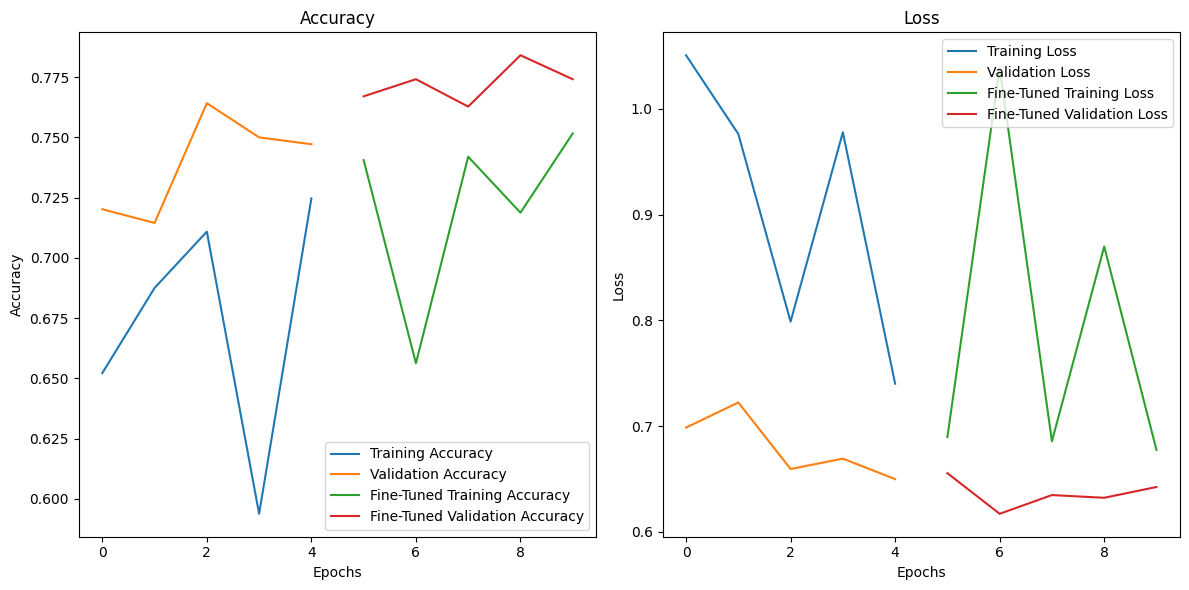

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
if 'accuracy' in history_fine_tune.history:
    plt.plot(range(len(history.history['accuracy']), 
                   len(history.history['accuracy']) + len(history_fine_tune.history['accuracy'])),
             history_fine_tune.history['accuracy'], label='Fine-Tuned Training Accuracy')
    plt.plot(range(len(history.history['val_accuracy']), 
                   len(history.history['val_accuracy']) + len(history_fine_tune.history['val_accuracy'])),
             history_fine_tune.history['val_accuracy'], label='Fine-Tuned Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
if 'loss' in history_fine_tune.history:
    plt.plot(range(len(history.history['loss']), 
                   len(history.history['loss']) + len(history_fine_tune.history['loss'])),
             history_fine_tune.history['loss'], label='Fine-Tuned Training Loss')
    plt.plot(range(len(history.history['val_loss']), 
                   len(history.history['val_loss']) + len(history_fine_tune.history['val_loss'])),
             history_fine_tune.history['val_loss'], label='Fine-Tuned Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class labels (replace with your actual class names)
class_labels = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'severe']  # Update based on your dataset

def predict_image(image_path, model, class_labels):
    """
    Predict the class of an image using a trained model.
    :param image_path: Path to the image to be predicted.
    :param model: Trained model for prediction.
    :param class_labels: List of class labels.
    :return: Predicted class label.
    """
    # Load and preprocess the image
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Resize the image to match model input
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_idx]

    # Return the predicted class
    return predicted_class, predictions[0]

# Test the prediction function
image_path = r"C:\Users\SURENDHAN\Desktop\repo\DR-detection\pro\colored_images\Mild\2d7666b8884f.png" # Replace with the path to your image
predicted_class, prediction_probs = predict_image(image_path, model, class_labels)

print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {prediction_probs}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: Mild
Prediction Probabilities: [0.4489951  0.3676831  0.10405155 0.04269685 0.03657337]


In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Load test data using the data generator
test_generator = train_datagen.flow_from_directory(
    r"C:\Users\SURENDHAN\Desktop\repo\DR-detection\pro\colored_images",  # Replace with your test dataset directory
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important to avoid shuffling for consistent results
)

# Predict probabilities on test data
y_pred_probs = model.predict(test_generator, verbose=1)

# Get the predicted and true labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions
y_true = test_generator.classes  # True labels from the generator

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'macro' for equal weightage of all classes
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys()))

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Found 3656 images belonging to 5 classes.


c:\Users\SURENDHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 69s 596ms/step
Accuracy: 0.7806
Precision: 0.7708
Recall: 0.7806
F1 Score: 0.7674

Confusion Matrix:
 [[ 144  169   45    4    2]
 [  60  794   50   34   61]
 [  19   30 1756    0    0]
 [  16  142   11   88   38]
 [   5   92    4   20   72]]

Classification Report:
                 precision    recall  f1-score   support

          Mild       0.59      0.40      0.47       364
      Moderate       0.65      0.79      0.71       999
         No_DR       0.94      0.97      0.96      1805
Proliferate_DR       0.60      0.30      0.40       295
        Severe       0.42      0.37      0.39       193

      accuracy                           0.78      3656
     macro avg       0.64      0.57      0.59      3656
  weighted avg       0.77      0.78      0.77      3656



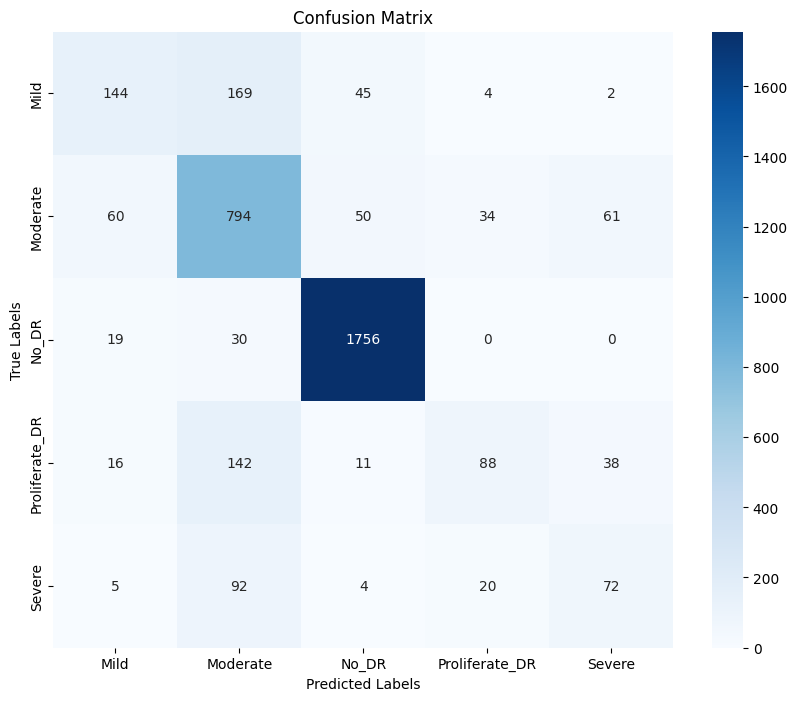

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()